# PREDICTION USING SUPERVISED MACHINE LEARNING

In [2]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

#importing the required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# READING THE DATASET FOR FURTHER ANALYSIS

In [3]:
#setting the working directory
os.chdir(R'C:\Users\TANIA DAS\Downloads')

#loading the csv data into a data frame
ad_data=pd.read_csv('Social_Network_Ads.csv')
display(ad_data)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Data is imported successfully

# EXPLORATORY DATA ANALYSIS

In [4]:
#head of the data set
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#checking data dimension
ad_data.shape

(400, 5)

In [6]:
#viewing the columns of the data
ad_data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
#checking the column information
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
#checking the structure of the data
ad_data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
#checking for missing values if any
ad_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
#summary of all the continuous variables
ad_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
#showing correlation between the variables
main=ad_data.iloc[:,[1,2,3,4]]# I have excluded column 'User Id' since no analysis can be done on it since it has unique values
ad_corr=main.corr()
display(ad_corr)

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<AxesSubplot:>

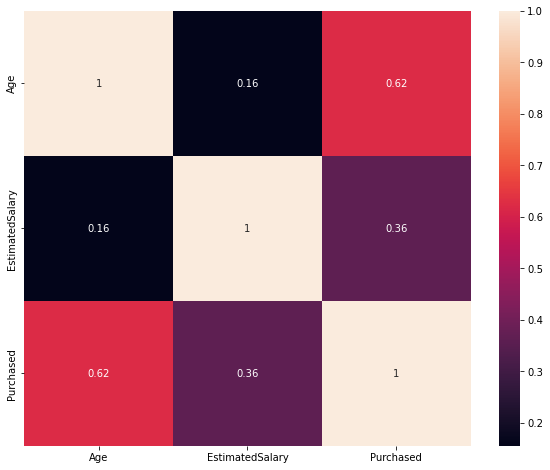

In [12]:
#plotting the correlation matrix using heeatmap
plt.subplots(figsize=(10,8))
sns.heatmap(ad_corr,annot=True)

Text(0.5, 0, 'SALARY')

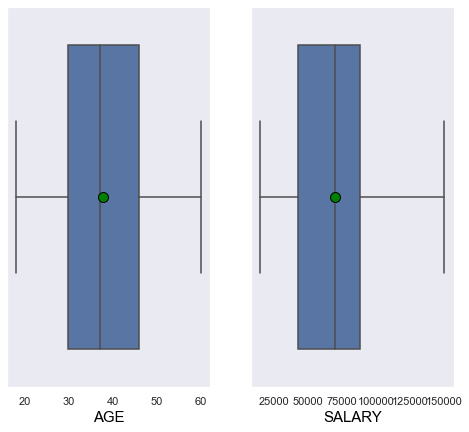

In [13]:
#plotting graphs for continuous variables to check data distribution
sns.set(style='dark')
plt.figure(figsize=(8,7))
plt.subplot(1,2,1)
sns.boxplot(ad_data['Age'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':10})
plt.xlabel('AGE',fontdict={'color':'black','fontsize':15})

plt.subplot(1,2,2)
sns.boxplot(ad_data['EstimatedSalary'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':10})
plt.xlabel('SALARY',fontdict={'color':'black','fontsize':15})


There are no outliers.

# DATA VISUALIZATION


## Categorical Unordered Univariate Analysis

Text(0, 0.5, 'COUNT')

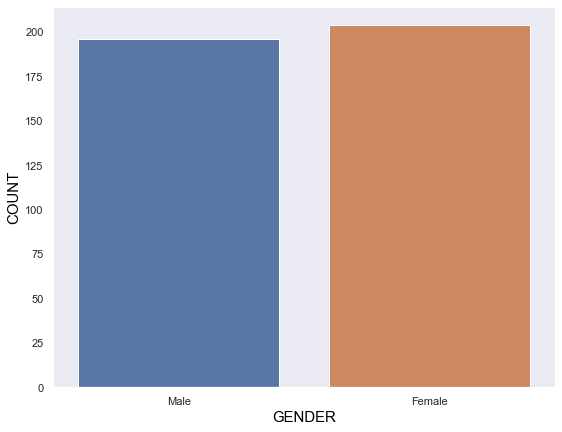

In [14]:
sns.set(style='dark')
plt.subplots(figsize=(9,7))
sns.countplot(ad_data['Gender'])
plt.xlabel('GENDER',fontdict={'color':'black','fontsize':15})
plt.ylabel('COUNT',fontdict={'color':'black','fontsize':15})

Under the categorical field 'Gender', "Female" appeared for the most number of times.

# BIVARIATE ANALYSIS

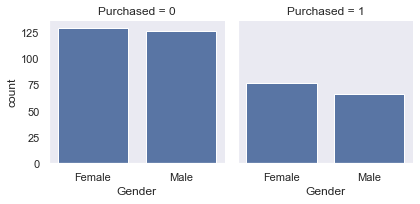

In [15]:
sns.set(style='dark')
g=sns.FacetGrid(ad_data,col='Purchased')
g.map(sns.countplot,'Gender')

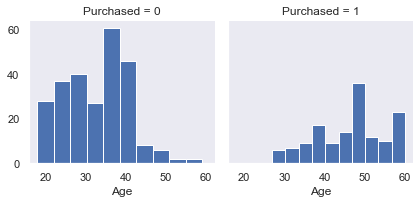

In [16]:
sns.set(style='dark')
g=sns.FacetGrid(ad_data,col='Purchased')
g.map(plt.hist,'Age')

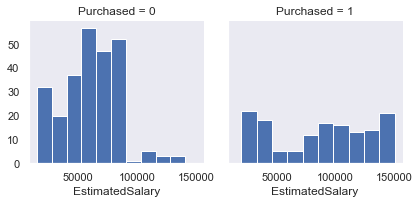

In [17]:
sns.set(style='dark')
g=sns.FacetGrid(ad_data,col='Purchased')
g.map(plt.hist,'EstimatedSalary')

# PREPARING THE DATA FOR MODELLING

In [18]:
x=ad_data.iloc[:,[1,2,3]]  #Independent Data
y=ad_data.iloc[:,4]        #Dependent Data

In [19]:
dummy_data=pd.get_dummies(ad_data['Gender'],prefix='Gender',prefix_sep='_') #Creating Dummies for the column 'Gender'
x=pd.concat([x,dummy_data],axis=1)
x=x.drop(['Gender'],axis=1)
display(x)

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


Text(0, 0.5, 'COUNT')

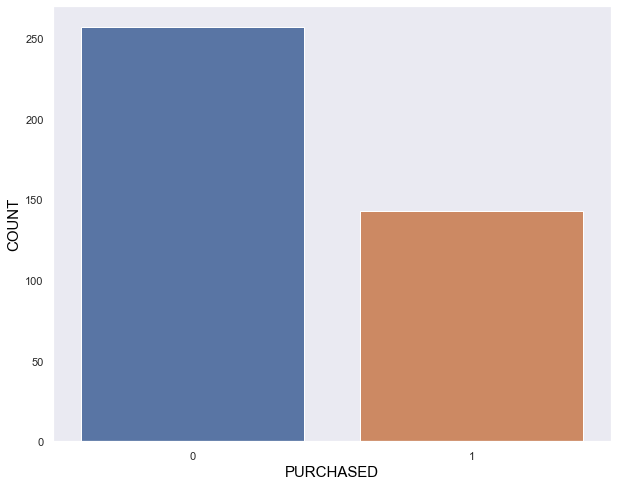

In [20]:
#Histogram for the dependent variable 'Purchased'
sns.set(style='dark')
plt.subplots(figsize=(10,8))
sns.countplot(ad_data['Purchased'])
plt.xlabel('PURCHASED',fontdict={'color':'black','fontsize':15})
plt.ylabel('COUNT',fontdict={'color':'black','fontsize':15})

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)  #Splitting the dataset into trainig set and test set

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 4)
(100, 4)
(300,)
(100,)


# BUILDING THE MODEL

In [23]:
from sklearn.linear_model import LogisticRegression
fitting=LogisticRegression(random_state=0)
fitting.fit(X_train,y_train)
y_pred=fitting.predict(X_test)

In [24]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
display(matrix)

array([[68,  0],
       [32,  0]], dtype=int64)

In [26]:
Overall_Accuracy=(68+0)/(68+0+32+0)
print('The overall accuracy is',Overall_Accuracy)

The overall accuracy is 0.68


In [27]:
Sensitivity=0/(0+32)
print('The Sensitivity is',Sensitivity)

The Sensitivity is 0.0


In [28]:
Specificity=68/(68+0)
print('The Specificity is',Specificity)

The Specificity is 1.0


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



In [32]:
!pip install imblearn

In [33]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

#On Train Data
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(os_data_X)
os_data_y= pd.DataFrame(os_data_y)

#On Test Data
os_data_test_X,os_data_test_y=os.fit_resample(X_test, y_test)
os_data_test_X = pd.DataFrame(os_data_test_X)
os_data_test_y= pd.DataFrame(os_data_test_y)

In [34]:
from sklearn.metrics import confusion_matrix
fitting=LogisticRegression(random_state=0)
fitting.fit(X_train,y_train)
y_pred=fitting.predict(X_test)

matrix1=confusion_matrix(y_test,y_pred)
display(matrix1)

array([[79,  0],
       [41,  0]], dtype=int64)

In [35]:
Overall_Accuracy1=(79+0)/(79+0+41+0)
print('The overall accuracy is',Overall_Accuracy1)

Sensitivity1=0/(0+41)
print('The Sensitivity is',Sensitivity1)

Specificity1=79/(79+0)
print('The Specificity is',Specificity1)

The overall accuracy is 0.6583333333333333
The Sensitivity is 0.0
The Specificity is 1.0


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        79
           1       0.00      0.00      0.00        41

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120



Text(0, 0.5, 'True Positive Rate')

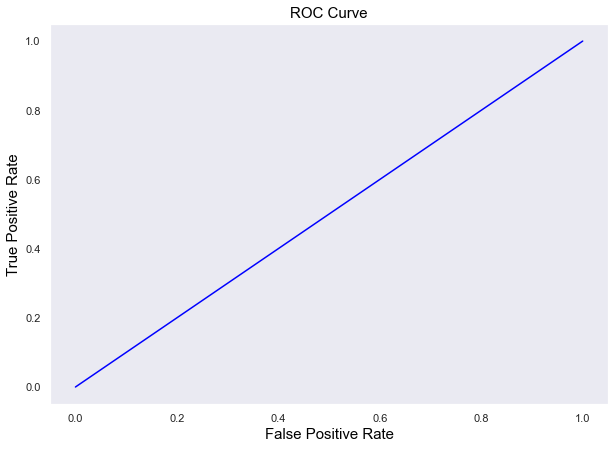

In [37]:
#Calculating ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,_=roc_curve(y_test,y_pred,drop_intermediate=False)
sns.set(style='dark')
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,color='blue')
plt.title('ROC Curve',fontdict={'color':'black','fontsize':15})
plt.xlabel('False Positive Rate',fontdict={'color':'black','fontsize':15})
plt.ylabel('True Positive Rate',fontdict={'color':'black','fontsize':15})

In [38]:
#Calculating the AUC score
roc_auc_score(y_test,y_pred)

0.5